# Project Description

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with
an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 
2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were
more likely to survive than others. In this challenge, we ask you to build a predictive model that answers the question:
“what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

print("All Libraries imported successfully")

All Libraries imported successfully


# Load the dataset

In [2]:
#file 1
train_df = pd.read_csv("Train.csv")
#file 2
test_df = pd.read_csv("test (1).csv")

display(train_df, test_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Concating the two datasets

In [3]:
df = pd.concat([train_df, test_df], ignore_index= True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Inspecting data

In [4]:
#Inspecting d structure & properties of our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
#to check for the numeric value of missing values per column

df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
#checking for the datatypes

df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Dropping irrelevant columns

This step is certainly needed in every EDA(Exploratory Data Analysis) because sometimes there would be many columns that
we'll never use, in such cases dropping is the only solution. "Columns that won't be needed for machine learning".

In [7]:
df = df.drop(["PassengerId", "Name", "Ticket"], axis=1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,male,22.0,1,0,7.2500,NaN,S
1,1.0,1,female,38.0,1,0,71.2833,C85,C
2,1.0,3,female,26.0,0,0,7.9250,NaN,S
3,1.0,1,female,35.0,1,0,53.1000,C123,S
4,0.0,3,male,35.0,0,0,8.0500,NaN,S


# In order to subset my data, we can now group them into two set: Numerical cols and categorical cols

In [8]:
num_cols = ["Pclass","Age","SibSp","Parch","Fare"]
cat_cols = [col for col in df.columns if col not in num_cols + ["Survived"]]

#we omited the "Survived" column because it's our dependent variable and needed for machine learning

display(num_cols, cat_cols)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

['Sex', 'Cabin', 'Embarked']

# Data Cleaning 

 Cleaning the "Cabin" column

In [9]:
df.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [10]:
for x in df.Cabin.dropna():
    for y in ["A","B","C","D","E","F","G"]:
        if y in x[0]:
            df["Cabin"].replace(x,y,inplace=True)

In [11]:
df["Cabin"].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In the cells code above, we assigned alphabets to the Cabins, and inspected how many people were in each cabins

We're goint to group the cabins into the various Ages and class(Pclass) to enable us know the Cabins with missing values.

In [12]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [13]:
df[['Cabin','Fare','Age']].groupby(['Cabin']).mean()

,Fare,Age
Cabin,,
A,41.244314,44.157895
B,122.383078,36.476190
C,107.926598,38.382791
D,53.007339,39.702381
E,54.564634,38.118421
F,18.079367,21.333333
G,14.205000,12.000000
T,35.500000,45.000000


From the observation above, we can see the fare for each cabin and the average ages of its occupants.
We can also say that the cabins with the highest fares are closer to life boats, more comfortable, and summarily has the highest survival rate and we can deduce that it is the "business class" cabins.

In [14]:
#Checking for the number of missing values in each cabin using the unique values

df[df['Pclass']==1].Cabin.isna().sum()

67

In [15]:
df[df['Pclass']==2].Cabin.isna().sum()

254

In [16]:
df[df['Pclass']==3].Cabin.isna().sum()

693

In [17]:
df[df['Pclass']==3].Cabin.value_counts()

F    8
G    5
E    3
Name: Cabin, dtype: int64

In [18]:
df[['Pclass','Cabin','Fare','Age']].groupby(['Cabin']).mean()

,Pclass,Fare,Age
Cabin,,,
A,1.000000,41.244314,44.157895
B,1.000000,122.383078,36.476190
C,1.000000,107.926598,38.382791
D,1.130435,53.007339,39.702381
E,1.243902,54.564634,38.118421
F,2.380952,18.079367,21.333333
G,3.000000,14.205000,12.000000
T,1.000000,35.500000,45.000000


In [19]:
class1 = df.loc[df['Pclass']==1]
class2 = df.loc[df['Pclass']==2]
class3 = df.loc[df['Pclass']==3]

In [20]:
#filling the missing values with the mode of each class
class1['Cabin']=class1['Cabin'].fillna(class1['Cabin'].mode()[0])
class2['Cabin']=class2['Cabin'].fillna(class2['Cabin'].mode()[0])
class3['Cabin']=class3['Cabin'].fillna(class3['Cabin'].mode()[0])

#concatinating(merging) the 3 classes in the Cabin column 
df2 = pd.concat([class1,class2,class3])

df2

C:\Users\HP\AppData\Local\Temp\ipykernel_10912\2521627958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class1['Cabin']=class1['Cabin'].fillna(class1['Cabin'].mode()[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_10912\2521627958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class2['Cabin']=class2['Cabin'].fillna(class2['Cabin'].mode()[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_10912\2521627958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1.0,1,female,38.0,1,0,71.2833,C,C
3,1.0,1,female,35.0,1,0,53.1000,C,S
6,0.0,1,male,54.0,0,0,51.8625,E,S
11,1.0,1,female,58.0,0,0,26.5500,C,S
23,1.0,1,male,28.0,0,0,35.5000,A,S
...,...,...,...,...,...,...,...,...,...
1303,NaN,3,female,28.0,0,0,7.7750,F,S
1304,NaN,3,male,NaN,0,0,8.0500,F,S
1306,NaN,3,male,38.5,0,0,7.2500,F,S
1307,NaN,3,male,NaN,0,0,8.0500,F,S


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


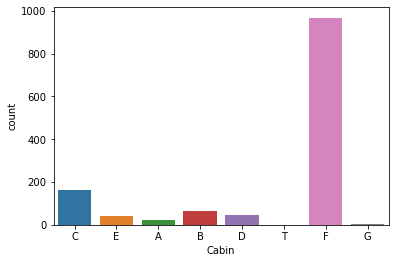

In [21]:
sns.countplot(df2['Cabin']);

In [22]:
#re-inspecting our dataset for missing values after cleaning the "Cabin" column

df2.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Cabin         0
Embarked      2
dtype: int64

In [23]:
df2.Cabin.value_counts()

F    968
C    161
B     65
D     46
E     41
A     22
G      5
T      1
Name: Cabin, dtype: int64

Cleaning the "Age" column

In [24]:
df2["Age"].unique()

array([38.  , 35.  , 54.  , 58.  , 28.  , 19.  , 40.  ,   nan, 42.  ,
       49.  , 65.  , 45.  , 23.  , 46.  , 71.  , 21.  , 47.  , 24.  ,
       37.  , 22.  , 51.  , 61.  , 56.  , 50.  , 44.  , 31.  , 32.  ,
       62.  , 30.  , 52.  , 63.  , 26.  ,  2.  ,  0.92, 17.  , 18.  ,
       36.  , 16.  , 45.5 , 29.  , 41.  , 60.  , 25.  , 27.  , 33.  ,
       14.  , 64.  ,  4.  , 34.  , 48.  , 55.  , 39.  , 53.  , 80.  ,
       15.  , 70.  , 43.  , 11.  , 13.  , 28.5 , 32.5 , 67.  , 76.  ,
        6.  , 57.  , 59.  , 66.  ,  3.  ,  5.  ,  0.83, 36.5 ,  1.  ,
        8.  ,  7.  ,  0.67, 20.  , 18.5 , 12.  , 14.5 , 70.5 ,  9.  ,
       55.5 , 40.5 , 20.5 , 23.5 , 10.  ,  0.75, 24.5 , 30.5 ,  0.42,
       34.5 , 74.  , 22.5 , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

From the observation in the "Age" column above, there are negative values which is impossible to be a representation of 
someone's age.
Hence the need to subset the column.

In [25]:
for x in df2.Age:
    if x < 0:
        df2['Age'] = df2['Age'].replace(x, abs(x))   
        
df2.Age.unique()
#in this line,I am using a for loop to iterate through the 
#age column and select ages that are negative and replacing 
#them with their positive values(i.e "abs")

array([38.  , 35.  , 54.  , 58.  , 28.  , 19.  , 40.  ,   nan, 42.  ,
       49.  , 65.  , 45.  , 23.  , 46.  , 71.  , 21.  , 47.  , 24.  ,
       37.  , 22.  , 51.  , 61.  , 56.  , 50.  , 44.  , 31.  , 32.  ,
       62.  , 30.  , 52.  , 63.  , 26.  ,  2.  ,  0.92, 17.  , 18.  ,
       36.  , 16.  , 45.5 , 29.  , 41.  , 60.  , 25.  , 27.  , 33.  ,
       14.  , 64.  ,  4.  , 34.  , 48.  , 55.  , 39.  , 53.  , 80.  ,
       15.  , 70.  , 43.  , 11.  , 13.  , 28.5 , 32.5 , 67.  , 76.  ,
        6.  , 57.  , 59.  , 66.  ,  3.  ,  5.  ,  0.83, 36.5 ,  1.  ,
        8.  ,  7.  ,  0.67, 20.  , 18.5 , 12.  , 14.5 , 70.5 ,  9.  ,
       55.5 , 40.5 , 20.5 , 23.5 , 10.  ,  0.75, 24.5 , 30.5 ,  0.42,
       34.5 , 74.  , 22.5 , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [26]:
#In order to get a fair and clean dataset , I need to replace all misssing values with the mean of the age column 
#but the mean value can't be calculated with all the missing values because that will give an inaccurate result.
#using the "loc" function I located missing values and solved for mean with the rest of the values.

age_mean = int(df2['Age'].loc[df2['Age'].isnull() == False].mean())
age_mean

29

In [27]:
#replacing the missing values with the mean(29)

df2.Age = df2.Age.fillna(age_mean)
df2.Age = df2.Age.astype(int) #converting to integer as it has float(decimal) datatype
df2.Age.unique() #re-inspecting the column

array([38, 35, 54, 58, 28, 19, 40, 29, 42, 49, 65, 45, 23, 46, 71, 21, 47,
       24, 37, 22, 51, 61, 56, 50, 44, 31, 32, 62, 30, 52, 63, 26,  2,  0,
       17, 18, 36, 16, 41, 60, 25, 27, 33, 14, 64,  4, 34, 48, 55, 39, 53,
       80, 15, 70, 43, 11, 13, 67, 76,  6, 57, 59, 66,  3,  5,  1,  8,  7,
       20, 12,  9, 10, 74])

Cleaning the "Sex" column

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


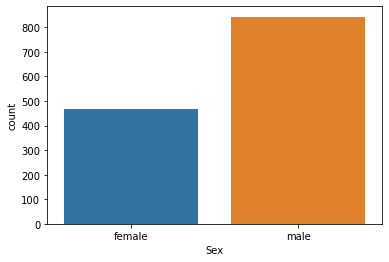

In [28]:
#Graphical representation to view the number of occurence of mislabelled values if any.
sns.countplot(df2['Sex']);

In [29]:
df2["Sex"]= df2["Sex"].replace({"female":"Female", "male":"Male"})
df2["Sex"].unique()

array(['Female', 'Male'], dtype=object)

Cleaning the "Embarked" column

In [30]:
#dropping the missing values in "Embarked" column
#dropping it because it has insignicant number of  missing values(2).

df2 = df2.dropna(subset=['Embarked'])
df2.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin         0
Embarked      0
dtype: int64

Cleaning the "Fare" column

In [31]:
df2.Fare.unique()

array([ 71.2833,  53.1   ,  51.8625,  26.55  ,  35.5   , 263.    ,
        27.7208, 146.5208,  82.1708,  52.    ,  76.7292,  61.9792,
        83.475 ,  47.1   ,  61.175 ,  34.6542,  63.3583,  77.2875,
       247.5208,  26.2833,  79.2   ,  66.6   ,  61.3792,  55.    ,
        25.925 ,  33.5   ,  30.6958,  28.7125,  50.    ,  31.    ,
       113.275 ,  76.2917,  90.    ,  52.5542,  86.5   , 512.3292,
        79.65  ,   0.    , 153.4625, 135.6333,  29.7   ,  77.9583,
        26.    ,  78.85  ,  91.0792, 151.55  ,  30.5   , 110.8833,
       108.9   ,  56.9292,  83.1583, 262.375 , 164.8667, 134.5   ,
        57.9792,  28.5   , 133.65  ,  35.    ,  75.25  ,  69.3   ,
        55.4417, 211.5   , 227.525 , 120.    ,  55.9   ,  81.8583,
        27.75  ,  89.1042,  38.5   ,  49.5042,  78.2667,  26.2875,
        59.4   ,  34.0208,  93.5   , 221.7792, 106.425 ,  49.5   ,
        71.    ,  39.6   ,  51.4792,  26.3875,  40.125 ,  42.4   ,
        32.3208,  30.    ,  25.5875, 211.3375,  57.    ,  25.9

In [32]:
#dropping the missing value(1) 
df2 = df2.dropna(subset=['Fare'])
df2.isnull().sum()

Survived    417
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [33]:
df2[['Cabin','Pclass','Fare','Age']].groupby(['Cabin']).mean()

,Pclass,Fare,Age
Cabin,,,
A,1.000000,41.244314,42.090909
B,1.000000,123.728573,35.809524
C,1.000000,92.255073,37.223602
D,1.130435,53.007339,38.760870
E,1.243902,54.564634,37.439024
F,2.723888,15.566838,26.990693
G,3.000000,14.205000,12.000000
T,1.000000,35.500000,45.000000


In [34]:
conditions = [(df2['Fare'] >= 150),
              (df2['Fare'] >= 70),
              (df2['Fare'] < 70)]
choices =['FirstClass','SecondClass','ThirdClass']

df2['Fare_group'] = np.select(conditions,choices, default=0)

In [35]:
df["Fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [36]:
 df2["SibSp"].unique()

array([1, 0, 3, 2, 4, 5, 8], dtype=int64)

In [37]:
df2["Parch"].unique()

array([0, 2, 1, 4, 3, 5, 6, 9], dtype=int64)

In [38]:
df2.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_group
1,1.0,1,Female,38,1,0,71.2833,C,C,SecondClass
3,1.0,1,Female,35,1,0,53.1000,C,S,ThirdClass
6,0.0,1,Male,54,0,0,51.8625,E,S,ThirdClass
11,1.0,1,Female,58,0,0,26.5500,C,S,ThirdClass
23,1.0,1,Male,28,0,0,35.5000,A,S,ThirdClass


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


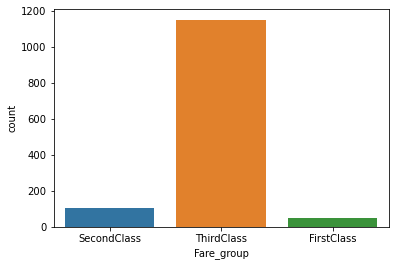

In [39]:
sns.countplot(df2['Fare_group']);

Histogram

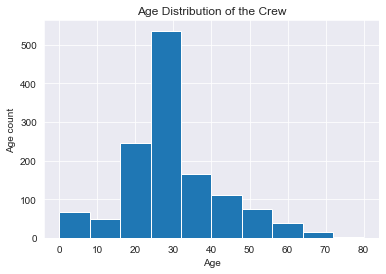

In [40]:
sns.set_style("darkgrid")
df2["Age"].hist()
plt.xlabel('Age')
plt.ylabel('Age count')

plt.title("Age Distribution of the Crew");

Scatterplot

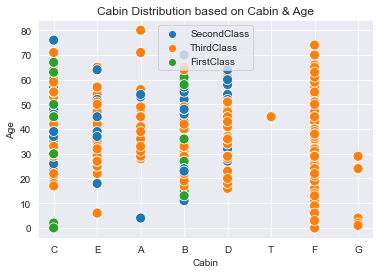

In [41]:
sns.scatterplot(x=df2.Cabin, 
                y=df2.Age, color='r',
                hue=df2.Fare_group, s=100)
plt.legend(loc='upper center')
plt.title("Cabin Distribution based on Cabin & Age");

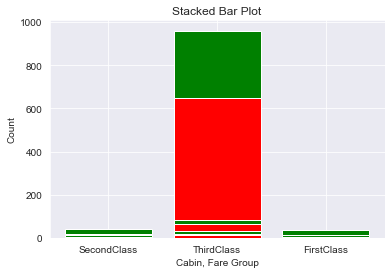

In [42]:
# Grouping the data by 'Cabin', 'Fare_group', and 'Age' columns and counting the occurrences
grouped_data = df2.groupby(['Cabin', 'Fare_group', 'Sex']).size().unstack().reset_index()
## creating a new columns of total number
grouped_data['Total_passengers'] = grouped_data['Female'] + grouped_data['Male']

# Plotting the stacked bar plot
plt.bar(grouped_data['Fare_group'], grouped_data['Male'], color='r')
plt.bar(grouped_data['Fare_group'], grouped_data['Female'], bottom=grouped_data['Male'], color='g')

# Setting the labels and title of the plot
plt.xlabel('Cabin, Fare Group')
plt.ylabel('Count')
plt.title('Stacked Bar Plot')
plt.show()

In [43]:
grouped_data

Sex,Cabin,Fare_group,Female,Male,Total_passengers
0,A,SecondClass,1.0,2.0,3.0
1,A,ThirdClass,3.0,16.0,19.0
2,B,FirstClass,10.0,5.0,15.0
3,B,SecondClass,13.0,11.0,24.0
4,B,ThirdClass,11.0,13.0,24.0
5,C,FirstClass,23.0,13.0,36.0
6,C,SecondClass,24.0,17.0,41.0
7,C,ThirdClass,22.0,62.0,84.0
8,D,SecondClass,11.0,6.0,17.0
9,D,ThirdClass,12.0,17.0,29.0


# Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. This is because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often, outliers can be seen with visualizations using a box plot.

# Graphical representation of outliers

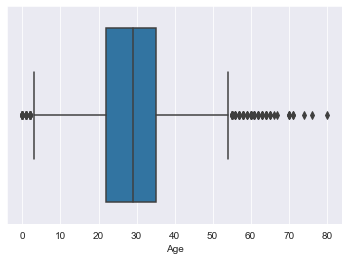

In [44]:
sns.boxplot(x=df2['Age']);

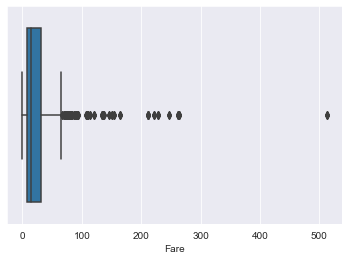

In [45]:
sns.boxplot(x=df2['Fare']);

In the plots above, you can find some points outside the box, those are the outliers.

Note: Outliers has to do with num_cols

# Dealing with outliers

In [46]:
df2.shape

(1306, 10)

In [47]:
for x in ['Fare']:
    q75,q25 = np.percentile(df2.loc[:,x],[75,25])
    intr_qr = q75-q25
 

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df2.loc[df2[x] < min,x] = np.nan
    df2.loc[df2[x] > max,x] = np.nan
df2["Fare"] = df2["Fare"].fillna(df2['Fare'].mean())

In [48]:
df2.Fare.describe()

count    1306.000000
mean       17.962074
std        12.903388
min         0.000000
25%         7.895800
50%        14.454200
75%        23.862500
max        65.000000
Name: Fare, dtype: float64

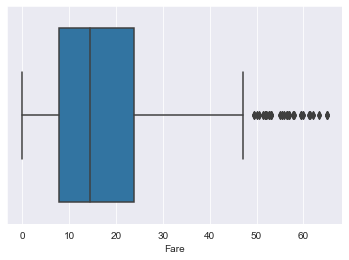

In [49]:
sns.boxplot(x=df2['Fare']);

In [50]:
df2.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_group
1,1.0,1,Female,38,1,0,17.962074,C,C,SecondClass
3,1.0,1,Female,35,1,0,53.100000,C,S,ThirdClass
6,0.0,1,Male,54,0,0,51.862500,E,S,ThirdClass
11,1.0,1,Female,58,0,0,26.550000,C,S,ThirdClass
23,1.0,1,Male,28,0,0,35.500000,A,S,ThirdClass


# MACHINE LEARNING

# Feature Preprocessing and transformation

Dealing with categorical columns

Label encoding

In [51]:
#We'll be transforming the "Cabin", "Embarked" and "Fare_group" categorical column, i.e "get_dummies" or one-hot encoding
# itensures that the machine learning algorithm does not interpret the categories as having any inherent order or magnitude

df2 = pd.get_dummies(df2, columns=['Cabin','Sex','Embarked','Fare_group'],drop_first=True)
df2.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Sex_Male,Embarked_Q,Embarked_S,Fare_group_SecondClass,Fare_group_ThirdClass
1,1.0,1,38,1,0,17.962074,0,1,0,0,0,0,0,0,0,0,1,0
3,1.0,1,35,1,0,53.100000,0,1,0,0,0,0,0,0,0,1,0,1
6,0.0,1,54,0,0,51.862500,0,0,0,1,0,0,0,1,0,1,0,1
11,1.0,1,58,0,0,26.550000,0,1,0,0,0,0,0,0,0,1,0,1
23,1.0,1,28,0,0,35.500000,0,0,0,0,0,0,0,1,0,1,0,1


In [52]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,889.0,0.382452,0.486260,0.0,0.0000,0.0000,1.0000,1.0
Pclass,1306.0,2.296325,0.837037,1.0,2.0000,3.0000,3.0000,3.0
Age,1306.0,29.630934,12.854092,0.0,22.0000,29.0000,35.0000,80.0
SibSp,1306.0,0.500000,1.042580,0.0,0.0000,0.0000,1.0000,8.0
Parch,1306.0,0.385911,0.866357,0.0,0.0000,0.0000,0.0000,9.0
Fare,1306.0,17.962074,12.903388,0.0,7.8958,14.4542,23.8625,65.0
Cabin_B,1306.0,0.048239,0.214353,0.0,0.0000,0.0000,0.0000,1.0
Cabin_C,1306.0,0.123277,0.328881,0.0,0.0000,0.0000,0.0000,1.0
Cabin_D,1306.0,0.035222,0.184411,0.0,0.0000,0.0000,0.0000,1.0
Cabin_E,1306.0,0.031394,0.174446,0.0,0.0000,0.0000,0.0000,1.0


# Feature Selection

In [53]:
df2.Survived.unique()

array([ 1.,  0., nan])

In [54]:
df2.dropna(inplace=True)
df2.shape

(889, 18)

In [55]:
x= df2.drop(['Survived'], axis=1)
y= df2['Survived']

In [56]:
x.values

array([[ 1., 38.,  1., ...,  0.,  1.,  0.],
       [ 1., 35.,  1., ...,  1.,  0.,  1.],
       [ 1., 54.,  0., ...,  1.,  0.,  1.],
       ...,
       [ 3., 39.,  0., ...,  0.,  0.,  1.],
       [ 3., 29.,  1., ...,  1.,  0.,  1.],
       [ 3., 32.,  0., ...,  0.,  0.,  1.]])

In [57]:
y

1      1.0
3      1.0
6      0.0
11     1.0
23     1.0
      ... 
882    0.0
884    0.0
885    0.0
888    0.0
890    0.0
Name: Survived, Length: 889, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=123)

In [59]:
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(711, 17)

(711,)

(178, 17)

(178,)

In [60]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
    
DTC.fit(x_train,y_train)

DTC_pred=DTC.predict(x_test)

print(confusion_matrix(y_test,DTC_pred))
print(classification_report(y_test,DTC_pred))

[[104  16]
 [ 13  45]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       120
         1.0       0.74      0.78      0.76        58

    accuracy                           0.84       178
   macro avg       0.81      0.82      0.82       178
weighted avg       0.84      0.84      0.84       178



In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


x= df2.drop(['Survived'], axis=1)
y= df2[['Survived']]

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(x, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Num Features: 5
Selected Features: [ True False False False False False  True False  True False False False
  True False  True False False]
Feature Ranking: [ 1 11  5 12 13  8  1  2  1 10  7  3  1  6  1  4  9]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 